In [1]:
%matplotlib widget
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataM1 = pd.read_csv("GBPUSD_M1.csv")
dataM1['Time'] = pd.to_datetime(dataM1['Time'])

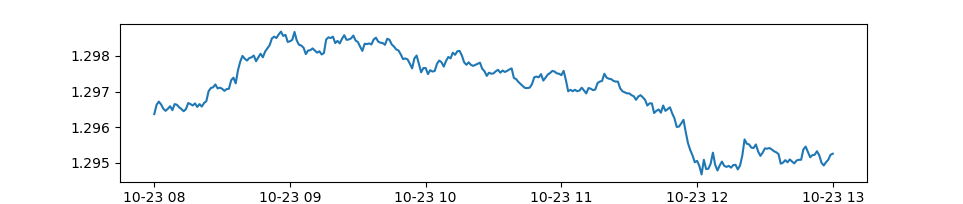

In [38]:
plt.clf()

study_start = pd.to_datetime("2024-10-23 8:00")
study_length = 5*60 # bars

start_index = dataM1[dataM1['Time'] >= study_start].index[0]

study_data = dataM1[start_index:start_index + study_length+1]

plt.plot(study_data['Time'], study_data['Open'])
plt.show()

frame_window = 100 # bars

kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)
gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, alpha=1, n_restarts_optimizer=0)

time_preds = []
y_preds = []
std_preds = []

for i in range(study_length + 1):
    frame_data = dataM1[(start_index-frame_window + i):(start_index + 1 + i)]
    
    X = np.arange(frame_window + 1).reshape(-1, 1)
    y = frame_data['Close'].values.reshape(-1, 1)
    
    gpr.fit(X, y)
    
    X_pred = np.array([[frame_window - 1]])
    y_pred, std_pred = gpr.predict(X_pred, return_std=True)
    
    y_preds.append(y_pred)
    std_preds.append(std_pred)
    time_preds.append(frame_data['Time'].values[-1])

y_preds = np.array(y_preds).flatten()
std_preds = np.array(std_preds).flatten()
time_preds = np.array(time_preds).flatten()

plt.plot(time_preds, y_preds)

plt.fill_between(
    time_preds, 
    y_preds + 1.96 * std_preds, 
    y_preds - 1.96 * std_preds, 
    alpha=0.2,
    color='blue',
    label='95% Confidence Interval'
)
